<a href="https://colab.research.google.com/github/Allajka/statistics/blob/main/seminar_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

## Решение
Ранее мы определили:
* Ковариация: cov = 9157.84 ---> Обе величины двигаются вверх.

* Коэффициент корреляции Пирсона: r = 0.89

Таким образом, мы предполагаем сильную линейную зависимость и можно проводить регрессионный анализ.  

## 1) Построим модель с intercept используя математические формулы, а для проверки воспользуемся готовым решением в Pyhton

1. Определимся с моделью: 

$$\hat{ks} = β_0 + β_1 * zp$$
2. Определимся с коэффициентами β

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # независимая переменная, т.е. признак по которому мы будем предсказывать
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

In [41]:
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b0 = np.mean(ks) - b1 * np.mean(zp)
print(f"b0 = {b0} - интерсепт \nb1 = {b1}")

b0 = 444.1773573243596 - интерсепт 
b1 = 2.620538882402765


Проверка с помощью функций Python


In [57]:
# задаем модель линейной регрессии 
model = LinearRegression()

# делаем независимой массив двумерным атрибутом reshape(-1, 1)
zp = zp.reshape(-1, 1)

# подбираем коэффициенты 
regres = model.fit(zp, ks)

# коэффициенты
b0 = regres.intercept_
b1 = regres.coef_[0]

print(f"b0 = {b0} - интерсепт \nb1 = {b1}")

b0 = 444.1773573243595 - интерсепт 
b1 = 2.6205388824027662


Расчеты сошлись.

3. Подставляем в формулу признак и производим расчет прогнозируемого.

In [60]:
ks_pred_intercept = 444.1773573243595 + 2.6205388824027662 * zp
ks_pred_intercept

array([[535.89621821],
       [562.10160703],
       [942.07974498],
       [968.2851338 ],
       [548.99891262],
       [627.61507909],
       [585.68645697],
       [837.25818968],
       [758.64202321],
       [732.43663439]])

In [61]:
# подставим независимые данные в модель и посчитаем предикартовые(предсказываемые) значения кредитного скоринга
ks_pred_intercept = model.predict(zp)
ks_pred_intercept

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

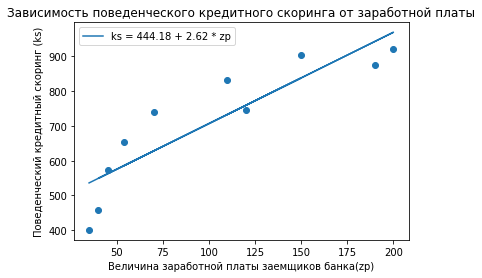

In [77]:
plt.scatter(zp, ks)
plt.title('Зависимость поведенческого кредитного скоринга от заработной платы')
plt.plot(zp, ks_pred_intercept, label=r'ks = 444.18 + 2.62 * zp')
plt.legend()
plt.xlabel('Величина заработной платы заемщиков банка(zp)')
plt.ylabel('Поведенческий кредитный скоринг (ks)')
plt.show()

## 2) Построим модель **без** intercept используя матричный метод, а для проверки воспользуемся готовым решением в Pyhton

1. Определимся с моделью: 

$$\hat{ks} = β_1 * zp$$
2. Определимся с коэффициентами β

В случае, отсутствия интерсепта величина коэффициена b расчитывается матричным методом

In [82]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # независимая переменная, т.е. признак по которому мы будем предсказывать
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 
# превращаем массивы в вектор-столбец с помощью атрибута reshape
ks=ks.reshape((-1,1))
zp=zp.reshape((-1,1))
# Если по какой-то причине мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))[0, 0]
print(f"b1 = {B}")

b1 = 5.889820420132688


Проверка с помощью функций Python

In [84]:
# задаем модель линейной регрессии 
model = LinearRegression(fit_intercept = False)

# делаем независимой массив двумерным атрибутом reshape(-1, 1)
zp = zp.reshape(-1, 1)

# подбираем коэффициенты 
regres = model.fit(zp, ks)

# коэффициенты
b0 = regres.intercept_
b1 = regres.coef_[0, 0]

print(f"b0 = {b0} - интерсепт \nb1 = {b1}")

b0 = 0.0 - интерсепт 
b1 = 5.889820420132688


Расчеты сошлись.

3. Подставляем в формулу признак и производим расчет прогнозируемого.

In [85]:
ks_pred = 5.889820420132688 * zp
ks_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [86]:
# подставим независимые данные в модель и посчитаем предикартовые(предсказываемые) значения кредитного скоринга
ks_pred = model.predict(zp)
ks_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

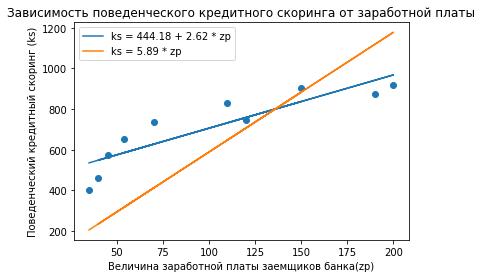

In [87]:
plt.scatter(zp, ks)
plt.title('Зависимость поведенческого кредитного скоринга от заработной платы')
plt.plot(zp, ks_pred_intercept, label=r'ks = 444.18 + 2.62 * zp')
plt.plot(zp, ks_pred, label=r'ks = 5.89 * zp')
plt.legend()
plt.xlabel('Величина заработной платы заемщиков банка(zp)')
plt.ylabel('Поведенческий кредитный скоринг (ks)')
plt.show()

## Коэффициент детерминации
После того как построили модель линейной регрессии мы должны оценить полученную модель.

In [94]:
# задаем модель линейной регрессии 
model = LinearRegression(fit_intercept = False)
# делаем независимой массив двумерным атрибутом reshape(-1, 1)
zp = zp.reshape(-1, 1)
# подбираем коэффициенты 
regres = model.fit(zp, ks)
regres.score(zp, ks)

-0.8549037531632884

In [95]:
# задаем модель линейной регрессии 
model = LinearRegression()
# делаем независимой массив двумерным атрибутом reshape(-1, 1)
zp = zp.reshape(-1, 1)
# подбираем коэффициенты 
regres = model.fit(zp, ks)
regres.score(zp, ks)

0.7876386635293685

**Вывод:** графически видно, что модель с использованием intercept ближе к фактическим значениям. Мы так же проверили это посчитав коэффициент детерминации, который при отсутствии intercept отрицательный, что значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.  

Поэтому используем модель с intercept, ведь там приблизительно 78.8% изменчивости описано с помощью математической модели.

# Задание 2 

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение:

$$\hat{ks} = β_1 * zp$$

In [130]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # независимая переменная, т.е. признак по которому мы будем предсказывать
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

**Функция потерь**

Показывает, насколько далеко истинные значения зависимого признака будут находиться от линии регресии(расчетных значений).

$$mse=\frac{Σ(y-y_{pred})^2}{n}$$

Нам нужно подобрать такое значение коэффициента b, при котором mse максимально близка 0, используя свойства производной. Вычислим производную функции потерь для B1:

In [97]:
# функция потерь для B1
def mse_(B1, y = y, x = x, n = len(y)):
  return np.sum((B1*x - y)**2) / n

In [111]:
alpha = 0.000001 # скорость обучения c помощью которого будем регулировать скорость подбора коэффициента b
B1 = 0.1
n = len(y)

In [112]:
for i in range(3000):
  B1 -=  alpha * (2/n) * np.sum((B1*x - y) * x)
  if i % 500 == 0: 
    print(f"Итерация {i}: B1 = {B1}, mse = {mse_(B1)}")

Итерация 0: B1 = 0.25952808, mse = 493237.7212546963
Итерация 500: B1 = 5.889815595583751, mse = 56516.858416040064
Итерация 1000: B1 = 5.8898204201285544, mse = 56516.85841571941
Итерация 1500: B1 = 5.889820420132673, mse = 56516.85841571943
Итерация 2000: B1 = 5.889820420132673, mse = 56516.85841571943
Итерация 2500: B1 = 5.889820420132673, mse = 56516.85841571943


**Ответ** При построении модели без intercept с помощью метода градиентного спуска коэффициэнт b = 5.889820420132673, что соответствует предыдущим расчетам.

# Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).



### Решение:

$$\hat{ks} = β_0 + β_1 * zp$$

In [22]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) 

In [28]:
# Функция потерь общая
def _mse(b0, b1, x = zp, y = ks):
    return np.sum(((b0 + b1 * x) - y)**2) / len(x)

In [24]:
# Частная производная функции потерь по b0
def _mse_b0(b0, b1, x = zp, y = ks): 
    return 2 * np.sum((b0 + b1 * x) -y) / len(x)

In [25]:
# Частная производная функции потерь по b1
def _mse_b1(b0, b1, x = zp, y = ks):
    return 2 * np.sum(((b0 + b1 * x) - y) * x) / len(x)

In [26]:
# Скорость обучения:
alpha = 5e-05

In [34]:
b1 = 0.1
b0 = 0.1
mse_min = _mse(b0, b1)
i_min = 1
b1_min = b1
b0_min = b0
   
for i in range(1000000):
    b0 -= alpha * _mse_b0(b0, b1)
    b1 -= alpha * _mse_b1(b0, b1)
    if i % 50000 == 0:
        print(f'Итерация {i}: b0 = {b0}, b1 = {b1}, mse = {_mse(b0, b1)}')
    if _mse(b0, b1) > mse_min:
        print(f'Итерация {i_min}: b0 = {b0_min}, b1 = {b1_min}, mse = {mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min = _mse(b0, b1)
        i_min = i
        b1_min = b1
        b0_min = b0
print(f'b0 = {b0_min} \nb1 = {b1_min}')

Итерация 0: b0 = 0.169966, b1 = 8.07468054476, mse = 122318.06397097567
Итерация 50000: b0 = 319.27767648420047, b1 = 3.5398324356503275, mse = 10427.569111705801
Итерация 100000: b0 = 409.0442373734796, b1 = 2.879127619051743, mse = 6783.521961452364
Итерация 150000: b0 = 434.29473705519484, b1 = 2.693277491833349, mse = 6495.188684804794
Итерация 200000: b0 = 441.3974680483413, b1 = 2.6409995775222037, mse = 6472.374468908443
Итерация 250000: b0 = 443.39540029510493, b1 = 2.62629428586797, mse = 6470.569306309746
Итерация 300000: b0 = 443.95740007610897, b1 = 2.622157823932053, mse = 6470.426473787141
Итерация 350000: b0 = 444.1154853937451, b1 = 2.6209942756156086, mse = 6470.415172240385
Итерация 400000: b0 = 444.159953325044, b1 = 2.6206669802831115, mse = 6470.414278011555
Итерация 450000: b0 = 444.1724617410292, b1 = 2.6205749151465225, mse = 6470.414207256183
Итерация 500000: b0 = 444.1759802422447, b1 = 2.6205490180788695, mse = 6470.414201657699
Итерация 520164: b0 = 444.1765